<a href="https://colab.research.google.com/github/Priyankamishra2098/OIBSIP/blob/main/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Oasis Infobyte**
## **Priyanka Mishra**



 Batch : October 2023

# **Project Name**    -  Unemployment Analysis During COVID-19



#### **Objective**


The primary goal of the Exploratory Data Analysis is to gain a comprehensive understanding of the impact of COVID-19 on unemployment across different states in India. This involves exploring the provided dataset to uncover patterns, trends, and insights related to the unemployment scenario. Specific objectives include:

1.Temporal Analysis:  Examine how the unemployment rate has evolved over time (monthly) during the COVID-19 period.
Identify any significant spikes or dips in unemployment and correlate them with key COVID-19 events or phases.

2.Geographical Analysis: Analyze variations in unemployment rates across different states to identify regions disproportionately affected by the pandemic. Explore whether certain states experienced more severe economic impacts than others.

3.Labor Participation Rate: Investigate the trends in the labor participation rate to understand changes in workforce dynamics during the pandemic.
Identify states where a significant portion of the working-age population withdrew from or re-entered the labor force.

4.Employment Status: Explore the estimated number of employed individuals to assess the overall employment scenario in each state. Identify states with notable changes in employment levels and understand the factors contributing to these changes.

5.Correlation Analysis: Investigate potential correlations between the unemployment rate and other relevant variables (e.g., COVID-19 case numbers, lockdown measures) to uncover underlying factors.

6.Descriptive Statistics: Calculate and analyze summary statistics for the unemployment rate, labor participation rate, and employed individuals to provide a quantitative overview.

7.Data Quality Assessment: Check for missing values, outliers, or inconsistencies in the dataset and address them appropriately to ensure the reliability of the analysis.

The ultimate aim is to derive actionable insights that can inform policymakers, researchers, and the public about the economic impact of COVID-19 on employment in different states of India. The results of the EDA can contribute to evidence-based decision-making and the formulation of targeted interventions to address unemployment challenges in the aftermath of the pandemic.

















## **1.Importing Libraries and Dataset**

### Importing Libraries

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported sucessfully")


Libraries imported sucessfully


### Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
unemp_rate = "/content/drive/MyDrive/Unemployment_Rate_upto_11_2020.csv"
print("Dataset loaded sucessfully")

Dataset loaded sucessfully


### Reading of Dataset

In [ ]:
df = pd.read_csv(unemp_rate)
print("Dataset Read Sucessfully")

Dataset Read Sucessfully


###Dimensions of Dataset

In [ ]:
print(df.shape)

(267, 9)


### Dataset First View

In [ ]:
df.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.tail(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


## **2.Understanding the Variables**

###About the Dataset



The dataset provides insights into the unemployment scenario across different Indian states:

1.States: The states within India.

2.Date: The date when the unemployment rate was recorded.

3.Measuring Frequency: The frequency at which measurements were taken (Monthly).

4.Estimated Unemployment Rate (%): The percentage of individuals unemployed in each state of India.

5.Estimated Employed Individuals: The count of people currently employed.

6.Estimated Labour Participation Rate (%): The proportion of the working population (age group: 16-64 years) participating in the labor force, either employed or actively seeking employment.

###Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df.describe().columns

Index([' Estimated Unemployment Rate (%)', ' Estimated Employed',
       ' Estimated Labour Participation Rate (%)', 'longitude', 'latitude'],
      dtype='object')

### Number of Duplicate Values in the Dataset

In [ ]:
# Duplicate Values/Duplicate Values Count

df.duplicated().sum()

0

### Null Values in the Dataset

In [ ]:
# Missing Values/Null Values Count
pd.set_option('display.max_columns', None)
pd.DataFrame(df.isna().sum()).T


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,0,0,0,0,0,0,0,0,0


## **3.Pre-processing and Cleaning of Data**

###Renaming Columns for Clarity

In [ ]:
# Renaming some columns for easier use

df.rename(columns={'Region': 'State'}, inplace=True)

print(df.head())

            State         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

### Formatting Columns and there Datatypes for easier Analysis

In [ ]:
print(df.columns)


Index(['State', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [ ]:
# Converting 'Date' column to datetime format
df[' Date'] = pd.to_datetime(df[' Date'], dayfirst=True)

# Converting 'Frequency' and 'Region' columns to categorical data type
df[' Frequency'] = df[' Frequency'].astype('category')
df['Region.1'] = df['Region.1'].astype('category')

# Extracting month from 'Date' and creating a 'Month' column
df['Month'] = df[' Date'].dt.month

# Converting 'Month' to integer format
df['Month_int'] = df['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
import calendar
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column
df.drop(columns='Month', inplace=True)

###Extracting New Data

In [ ]:
df.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


###Shape of Processed Data

In [ ]:
df.shape

(267, 11)

##**4.Basic Analysis**

###Total count of States in the Dataset

In [ ]:
print('The Total count of States in the Dataset is\n:',df['State'].value_counts())

The Total count of States in the Dataset is
: Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: State, dtype: int64


###Total count of Region in the Dataset

In [ ]:
print('The Total count of States in the Dataset is\n:',df['Region.1'].value_counts())

The Total count of States in the Dataset is
: North        79
South        60
West         50
East         40
Northeast    38
Name: Region.1, dtype: int64


###Statistical Summary of Data

In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude,Month_int
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425,5.535581
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738,2.870915
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400,1.000000
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600,3.000000
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300,6.000000
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900,8.000000
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600,10.000000


##5.**Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

###CHART1 : Distribution of Data on Each Series

array([[<Axes: title={'center': ' Date'}>,
        <Axes: title={'center': ' Estimated Unemployment Rate (%)'}>,
        <Axes: title={'center': ' Estimated Employed'}>],
       [<Axes: title={'center': ' Estimated Labour Participation Rate (%)'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'Month_int'}>, <Axes: >, <Axes: >]],
      dtype=object)

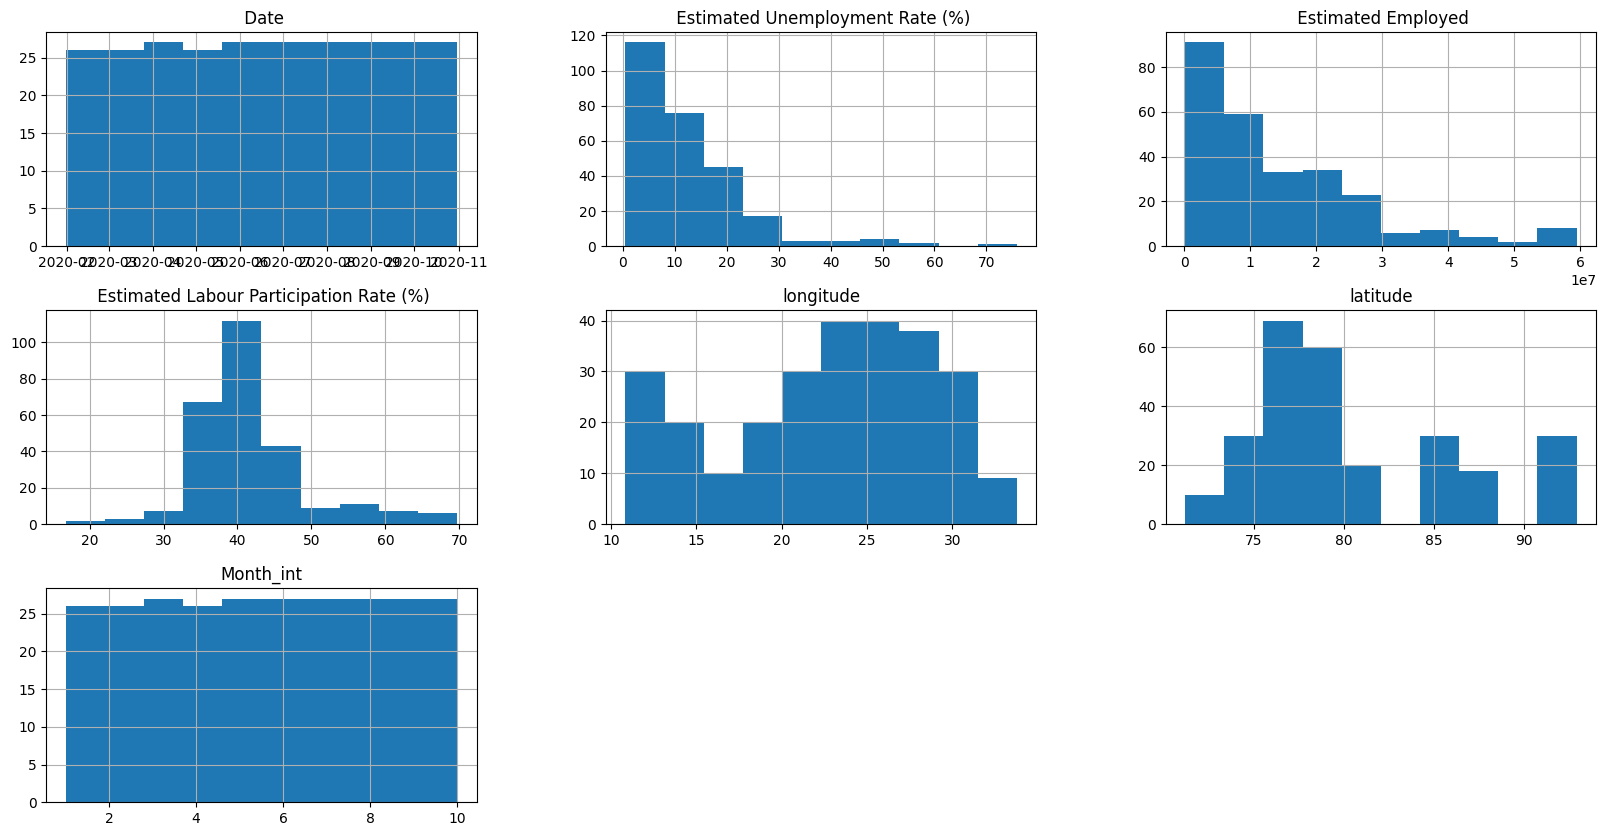

In [ ]:
# Histogram showing distribution of Data

df.hist(figsize = (20,10))

###CHART2 : Heatmap of Correlation among the columns

<function matplotlib.pyplot.show(close=None, block=None)>

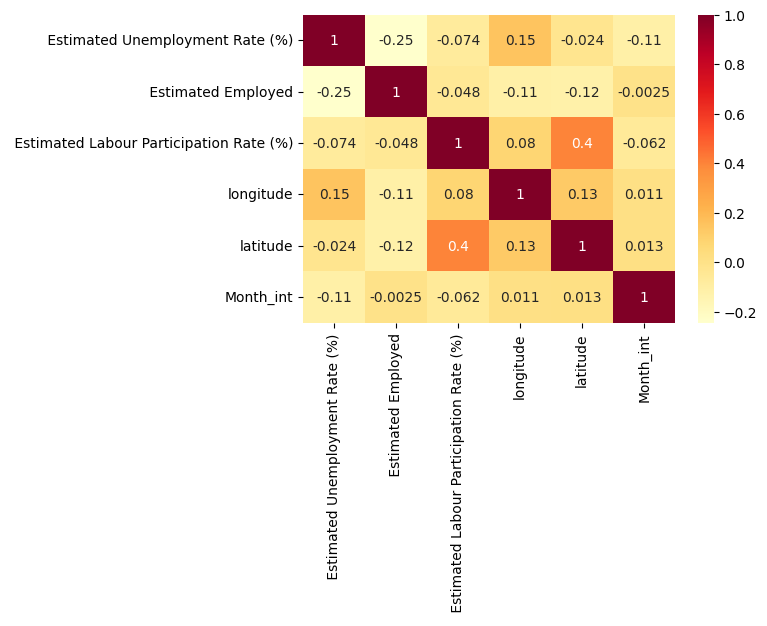

In [ ]:
fig,axes = plt.subplots(1,1,figsize = (6,4))
sns.heatmap(df.corr(),annot = True,cmap = "YlOrRd"
)
plt.show

###CHART3 : Unemployment rate per States

In [ ]:
# Boxplot visualizing Unemployment Rate per State

fig = px.box(df, x='State', y= ' Estimated Unemployment Rate (%)', color='State',
             title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

###CHART4 : Scatter Matrix to assess the relationship

In [ ]:
#scatter matrix with dimensions including 'Estimated Unemployment Rate', 'Estimated Employed', and 'Estimated Labour Participation Rate'

fig = px.scatter_matrix(df,dimensions=[' Estimated Unemployment Rate (%)',  ' Estimated Employed',
                                                          ' Estimated Labour Participation Rate (%)'],color='Region.1',template='plotly_dark')
fig.show()

###CHART5 : Average Unemployment Rate in Each State

In [ ]:
#Bargraph visualizing the average unemployment rate in each state
average_unemployment = df.groupby('State')[' Estimated Unemployment Rate (%)'].mean().reset_index()
average_unemployment = average_unemployment.sort_values(by=' Estimated Unemployment Rate (%)')

fig = px.bar(average_unemployment,
             x='State', y=' Estimated Unemployment Rate (%)',
             title='Average Unemployment Rate per State', template='seaborn',
             color='State',
             category_orders={'State': average_unemployment['State'].tolist()})  # Sort states in ascending order
fig.update_layout(xaxis_title='State', yaxis_title='Average Unemployment Rate (%)')

# Display the bar plot
fig.show()


#####  Insight(s) found from the chart?

Haryana and Jharkhand are the states that was unemployed in long.

###CHART6 : Unemployment Rate Across Region

In [ ]:
#Bargraph visualizing unemployment rate across region

fig = px.bar(df, x='Region.1', y=' Estimated Unemployment Rate (%)', animation_frame='Month_name', color='State',
             title='Unemployment rate across regions from Jan. 2020 to Oct. 2020', height=700, template='plotly_dark')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Adjusting the animation frame duration
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.show()

#####  Insight(s) found from the chart?

1.The North region had the highest unemployment rate throughout the months and West region the lowest.

2.Unemployment rate significantly increased in march month also decreased in september month

###CHART7 : Unemployment Rate in each Region and State

In [ ]:
#Sunburst chart visualizing the unemployment rate in each Region and State

 #Creating a DataFrame with relevant columns
unemployed_df = df[['State', 'Region.1', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)' ]]

unemployed = unemployed_df.groupby(['Region.1', 'State'])[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Creating a Sunburst chart
fig = px.sunburst(unemployed, path=['Region.1', 'State'], values=' Estimated Unemployment Rate (%)', color_continuous_scale='rdylbu',
                  title='Unemployment rate in each Region and State', height=550, template='presentation')

fig.show()

#####  Insight(s) found from the chart?

1.Northern Region has the highest unemployment rate comparatively.

2.In the Northern, top three states with highest unemployment rate are Haryana, Delhi and Jammu and kashmir. Haryana with the highest unemployment rate.

3.The West Region has the lowest unemployment rate with Goa having highest and Gujarat the lowest unemployment rate.


###CHART7 : Impact of lockdown on employment

The lockdown period in India was from March to May

In [ ]:
# Filter data for lockdown months (March, April, May)
lockdown_df = df[df['Month_name'].isin(['Feb','Mar', 'Apr', 'May','Jun'])]

# Create a grouped bar chart
fig = px.bar(lockdown_df, x='State', y=' Estimated Employed', color='Region.1',
             labels={' Estimated Employed': 'Employment Count'},
             title='Impact of Lockdown on Employment (March-May)',
             template='plotly_dark',
             text='Month_name')  # Display Month_name on the graph

fig.show()

In [ ]:
# Calculating the mean unemployment rate before lockdown by state
m_bf_lock = bf_lockdown.groupby('State')[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Calculating the mean unemployment rate during lockdown by state
m_lock = lockdown.groupby('State')[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Calculating the mean unemployment rate after lockdown by state
m_af_lock = af_lockdown.groupby('State')[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Combining the mean unemployment rates before, during, and after lockdown by state
m_lock['Unemployment Rate before lockdown'] = m_bf_lock[' Estimated Unemployment Rate (%)']
m_lock['Unemployment Rate after lockdown'] = m_af_lock[' Estimated Unemployment Rate (%)']
m_lock['Unemployment Rate during lockdown'] = m_lock[' Estimated Unemployment Rate (%)']

m_lock = m_lock[['State', 'Unemployment Rate before lockdown', 'Unemployment Rate during lockdown', 'Unemployment Rate after lockdown']]
m_lock.head()


,State,Unemployment Rate before lockdown,Unemployment Rate during lockdown,Unemployment Rate after lockdown
0,Andhra Pradesh,5.655,14.576667,6.320
1,Assam,4.535,8.460000,2.822
2,Bihar,10.450,36.010000,13.156
3,Chhattisgarh,9.015,7.150000,7.742
4,Delhi,18.535,25.330000,14.216


#####  Insight(s) found ?

1.The Unemployment Rate before lockdown was low as compared to during and after lockdown period then during lockdown it increased and then after it again decreased as compare to lockdown period.

2.Bihar was the state with highest increase in unemployment rate during lockdown thus the most affected.

3.Chattisgarh was the least affected.

4.The state who recovered, where the unemployment rate decreased with high margin after lockdown is Bihar

###CHART8 : Percentage Change in Unemployment Rate

In [ ]:
# Bargraph visualizing percentage change in unemployment rate

m_lock['Percentage change in Unemployment'] = round(m_lock['Unemployment Rate after lockdown'] - m_lock['Unemployment Rate before lockdown']/m_lock['Unemployment Rate before lockdown'],2)
plot_per = m_lock.sort_values('Percentage change in Unemployment')


# percentage change in unemployment after lockdown

fig = px.bar(plot_per, x='State',y='Percentage change in Unemployment',color='Percentage change in Unemployment',
            title='Percentage change in Unemployment in each state after lockdown',template='ggplot2')
fig.show()

#####  Insight(s) found from the chart?

1.The most affected states/territories in India during the lockdown in case of unemployment were:

Tripura
Haryana
Bihar
Puducherry
Jharkhand
Jammu & Kashmir
Delhi

2.Haryana being the most affected state


In [ ]:
# Identify states with the highest increase in unemployment rate during lockdown
most_impacted_states = m_lock.sort_values(by='Unemployment Rate during lockdown', ascending=False)['State'].head(3).tolist()

# Print key insights
print("Key Insights:")
print("1. The states most impacted by the lockdown in terms of increased unemployment rates are:", most_impacted_states)
print("2. Overall, there was a significant rise in unemployment rates during the lockdown period.")
print("3. States showed varying degrees of recovery after the lockdown, with some experiencing a quicker rebound than others.")
print("4. The analysis highlights the need for targeted interventions in the most affected regions.")


Key Insights:
1. The states most impacted by the lockdown in terms of increased unemployment rates are: ['Puducherry', 'Jharkhand', 'Bihar']
2. Overall, there was a significant rise in unemployment rates during the lockdown period.
3. States showed varying degrees of recovery after the lockdown, with some experiencing a quicker rebound than others.
4. The analysis highlights the need for targeted interventions in the most affected regions.


##6.**Overall Insights Gained**


The analysis of unemployment data before, during, and after the lockdown in India reveals several key insights:

**1.Lockdown Impact:**

During the lockdown months of March to May, there was a noticeable increase in
the mean unemployment rates across various states.
The impact of the lockdown varied, with some states experiencing a more significant rise in unemployment compared to others.

**2.Regional Variances:**

Regional variations were observed, emphasizing the importance of understanding the localized impact of the lockdown on employment.
States within different regions showed distinct patterns in terms of how unemployment rates were affected.

**3.Post-Lockdown Recovery:**

Post-lockdown, some states exhibited signs of recovery with a decrease in unemployment rates, while others faced challenges in returning to pre-lockdown levels.
The pace and extent of recovery varied, suggesting diverse economic landscapes across states.

**4.Hotspot Identification:**

Through the analysis, specific states were identified as hotspots with the highest increase in unemployment rates during the lockdown.
These hotspots may require targeted interventions and policy measures to address the economic challenges faced by their populations.

**5.Policy Implications:**

The findings underscore the importance of region-specific policy considerations, recognizing that the impact of the lockdown on employment is not uniform across the country.
Tailored interventions and support measures may be crucial for the most affected regions to stimulate economic recovery.






##6.**Conclusion**

**In conclusion, the analysis provides valuable insights into the nuanced effects of the lockdown on unemployment in India. These findings can inform policymakers, researchers, and stakeholders in devising targeted strategies for economic revival and addressing the specific needs of regions facing heightened unemployment challenges.**